
📌 ADF Test on Original MA Series
ADF Statistic: -0.46337568622186703
p-value: 0.8989675203539902
Critical Values: {'1%': np.float64(-3.60098336718852), '5%': np.float64(-2.9351348158036012), '10%': np.float64(-2.6059629803688282)}
❌ The series is NON-STATIONARY (Fail to reject H0).

📌 ADF Test on Differenced MA Series (Stationary)
ADF Statistic: -2.601940841322446
p-value: 0.09259679812708749
Critical Values: {'1%': np.float64(-3.6155091011809297), '5%': np.float64(-2.941262357486514), '10%': np.float64(-2.6091995013850418)}
❌ The series is NON-STATIONARY (Fail to reject H0).


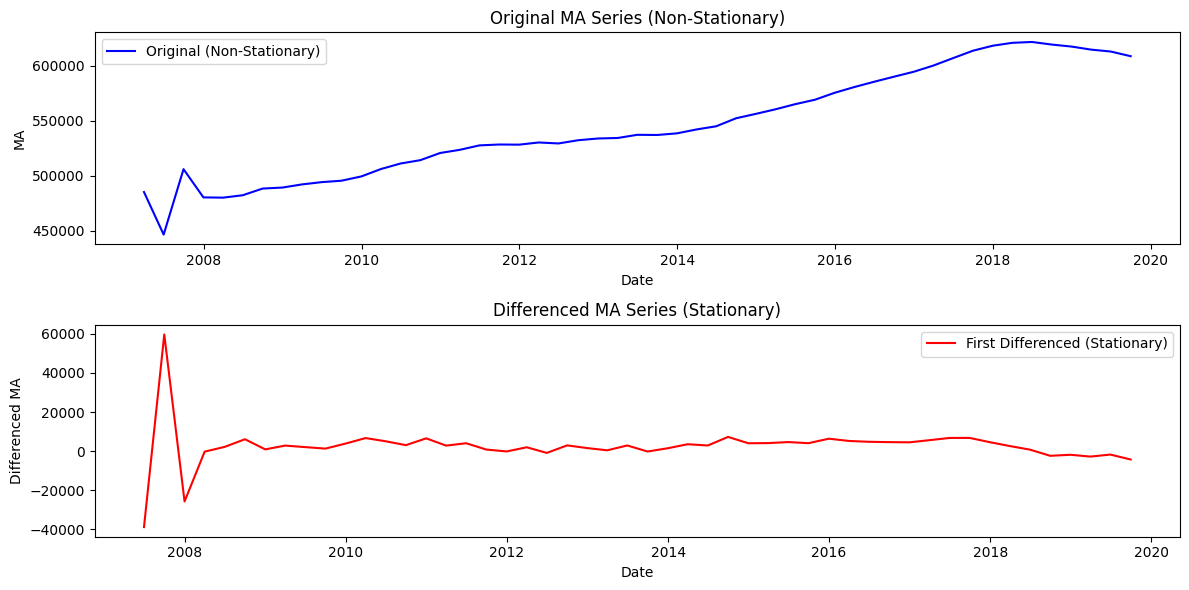

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Load your dataset
df = pd.read_csv("ma_lga_12345.csv")

# Convert 'saledate' to datetime format
df['saledate'] = pd.to_datetime(df['saledate'], format="%d/%m/%Y")

# Sort dataset by date
df = df.sort_values('saledate')

# Aggregate by date (if multiple values exist for a date, take the mean)
df = df.groupby('saledate', as_index=False)['MA'].mean()

# Set the date as index
df.set_index('saledate', inplace=True)

# Extract the 'MA' time series
series = df['MA']

# Function to perform ADF test
def adf_test(series, title):
    """Performs the Augmented Dickey-Fuller (ADF) test and prints results."""
    result = adfuller(series)
    print(f"\n📌 ADF Test on {title}")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")

    if result[1] > 0.05:
        print("❌ The series is NON-STATIONARY (Fail to reject H0).")
    else:
        print("✅ The series is STATIONARY (Reject H0).")

# ADF test on original data
adf_test(series, "Original MA Series")

# First differencing to make the data stationary
series_diff = series.diff().dropna()

# ADF test after differencing
adf_test(series_diff, "Differenced MA Series (Stationary)")

# Plot both graphs
plt.figure(figsize=(12, 6))

# Plot Original Series (Non-Stationary)
plt.subplot(2, 1, 1)
plt.plot(series, color='blue', label="Original (Non-Stationary)")
plt.title("Original MA Series (Non-Stationary)")
plt.xlabel("Date")
plt.ylabel("MA")
plt.legend()

# Plot Differenced Series (Stationary)
plt.subplot(2, 1, 2)
plt.plot(series_diff, color='red', label="First Differenced (Stationary)")
plt.title("Differenced MA Series (Stationary)")
plt.xlabel("Date")
plt.ylabel("Differenced MA")
plt.legend()

plt.tight_layout()
plt.show()
